In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0023-09.TAUX.nc')
TAUX = data1.variables['TAUX'][0,200:319,550:1500]
lont = data1.variables['ULONG'][200:319,550:1500]
latt = data1.variables['ULAT'][200:319,550:1500]
TAUX[TAUX == -1.0] = np.nan

## 200:319      ---------     -70 - -65
## 319:428      ---------     -65 - -60
## 428:521      ---------     -60 - -55

## Lont [-55,40]

In [3]:
result = np.zeros((3720))
i=0
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,331)]
i =0
for year in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+year+'-'+mm +'.TAUX.nc')
        U = data.variables['TAUX'][0,428:521,1100:1500]
        U[U == -1.0] = np.nan
        re = np.nanmean(U,axis=0)
        result[i] = np.nanmean(re,axis=0)
        i = i+1

In [4]:
result[1254] = (result[1252] +  result[1256])/2
result[1255] = (result[1252] +  result[1256])/2

In [5]:
ww1 = np.convolve(result, np.ones((60,))/60, mode='valid')

In [6]:
ww1.mean()

1.670609815346677

Text(0.5, 1.0, 'Wind Stress Square Value (5 Year running averaged, 60$^\\circ$W - 30$^\\circ$E, 50$^\\circ$S - shoreline)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


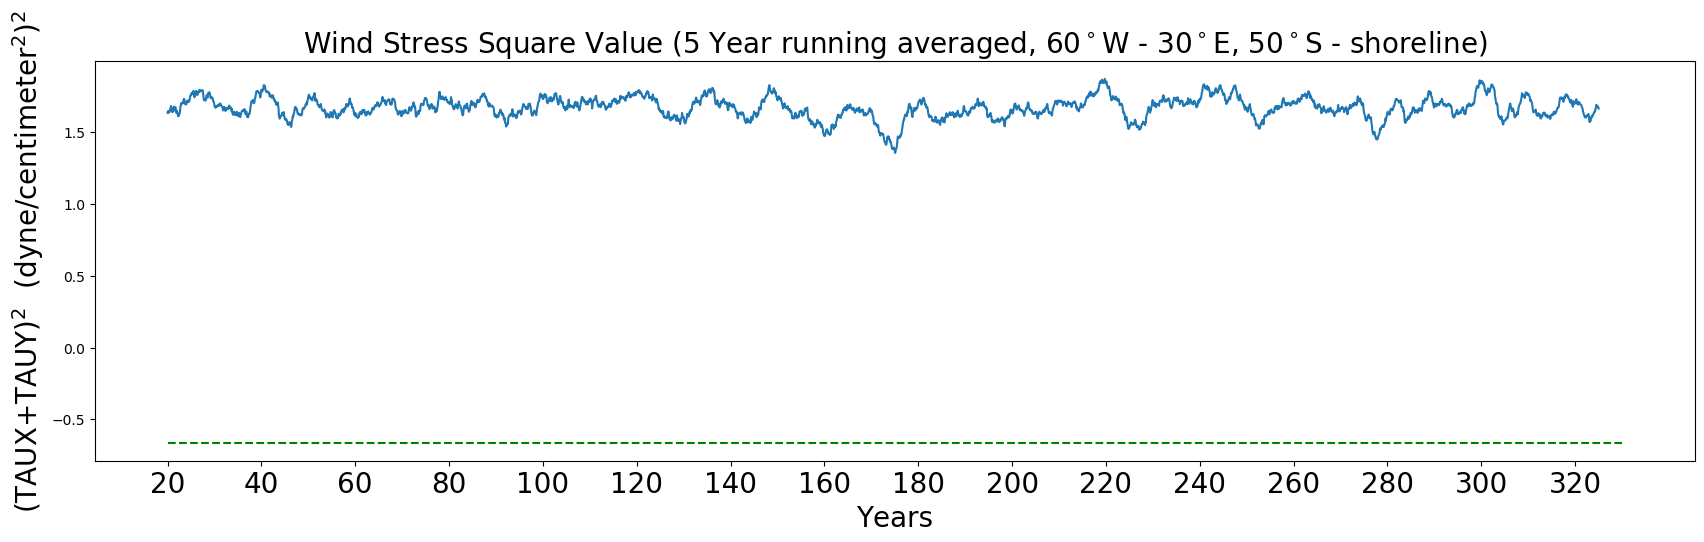

In [7]:
fig = plt.figure(figsize=(20, 5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(ww1)
#im = ax0.plot(result,'r*')
plt.hlines(-0.661649753271268, 0, 3720, colors = "g",linestyles = "dashed")
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,3720,240), ['20', '40', '60', '80','100','120','140','160',\
                             '180','200','220', '240', '260','280','300','320'],**my_font)
#plt.yticks(np.arange(1.1,1.6,0.05), ['1.1','1.15','1.2','1.25','1.3','1.35', '1.4','1.45', '1.5','1.55'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(TAUX+TAUY)$^2$  (dyne/centimeter$^2$)$^2$',**my_font)
ax0.set_title('Wind Stress Square Value (5 Year running averaged, 60$^\circ$W - 30$^\circ$E, 50$^\circ$S - shoreline)',**my_font)
#plt.savefig("TAU2.png")